In [5]:
#예제 7-3 다중 회귀분석
# -*- coding: utf-8 -*-

#기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
Step.1~3 데이터 준비
'''

#csv 파일을 데이터 프레임으로 변환
df = pd.read_csv('./auto-mpg.csv', header=None)

#열 이름 지정
df.columns =['mpg','cylinders','displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']

#horsepower 열의 자료형 변경(문자열 -> 숫자)
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True) #누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float') #문자열을 실수형으로 변환

#분석에 활용할 열(속성) 선택(연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

'''
Step.4 데이터셋 구분- 훈련용(train data)/검증용(test data)
'''

#속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']] #독립변수 X1, X2, X3
y=ndf['mpg'] #종속변수 y

#train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)


In [6]:
'''
Step.5 단순회귀분석 모형
'''

#sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

#단순회귀분석 모형 객체 생성
lr = LinearRegression()

#train data를 가지고 모형 학습
lr.fit(X_train, y_train)

#학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

#회귀식의 기울기
print('X 변수의 계수 a:', lr.coef_)
print('\n')

#회귀식의 y절편
print('상수항 b', lr.intercept_)

0.6939048496695599


X 변수의 계수 a: [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.414351269634025


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


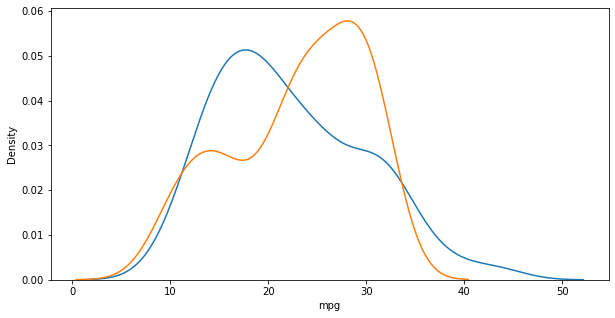

In [7]:
#train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력
y_hat = lr.predict(X_test)

plt.figure(figsize =(10,5))
ax1 = sns.distplot(y_test, hist=False, label="y_test")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat",ax=ax1)
plt.show()
plt.close()

In [9]:
#KNN 분류 알고리즘
#k-nearest-neighbors

# -*-coding: utf-8 -*-
#기본 라이브러리 불러오기

import pandas as pd
import seaborn as sns

'''
Step.1 데이터 준비 - seaborn에서 제공하는 titanic 데이터셋 가지오기
'''

#load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#데이터 살펴보기
print(df.head())
print('\n')

#IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [11]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
'''
Step.2 데이터 탐색/ 전처리
'''

#데이터 자료형 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [17]:
#NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'alive' 'alone']


In [18]:
#age열에 나이 데이터가 없는 모든 행 삭제- age 열 (891개 중 177개의 NaN값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

714


In [20]:
#embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

S


          survived      pclass   sex         age       sibsp       parch  \
count   714.000000  714.000000   714  714.000000  714.000000  714.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   453         NaN         NaN         NaN   
mean      0.406162    2.236695   NaN   29.699118    0.512605    0.431373   
std       0.491460    0.838250   NaN   14.526497    0.929783    0.853289   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    1.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    2.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    1.000000   
max       1.000000    3.000000   NaN   80.000000    5.000000    6.000000   

              fare embarked  class  who adult_male alive alone  
count   714.000000

In [21]:
'''
Step.3 분석에 사용할 속성 선택
'''

#분석에 사용할 열(속성) 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


In [26]:
#원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)
print(ndf.head())
print()
ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

KeyError: 'sex'

In [27]:
ndf

,survived,pclass,age,sibsp,parch,female,male,female,male,female,male,town_C,town_Q,town_S
0,0,3,22.0,1,0,0,1,0,1,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,1,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,1,0,1,0,1,0,0,1,0
886,0,2,27.0,0,0,0,1,0,1,0,1,0,0,1
887,1,1,19.0,0,0,1,0,1,0,1,0,0,0,1
889,1,1,26.0,0,0,0,1,0,1,0,1,1,0,0


In [28]:
'''
Step.4 데이터셋 구분- 훈련용 train dat/ 검증용 test data
'''

#속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
        'town_C', 'town_Q', 'town_S']] #설병변수 X
y = ndf['survived']                    #예측변수 y

#설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

#train data와 test data 로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 13)
test data 개수:  (215, 13)


In [29]:
'''
Step.5 KNN분류 모형 - sklearn 사용
'''

#sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

#모형 객체 생성(k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

#train data를 가지고 모형 학습
knn.fit(X_train, y_train)

#test data를 가지고 y_hat을 예측(분류)
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [30]:
#모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
knn_matrix = metrics.confusion_matrix(y_test,y_hat)
print(knn_matrix)

[[109  16]
 [ 24  66]]


In [31]:
#모형 성능 평가 - 평가 지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       125
           1       0.80      0.73      0.77        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.81       215
weighted avg       0.81      0.81      0.81       215



In [37]:
#예제 7-5 SVM 모형

# -*- coding: utf-8 -*-

#기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
Step.1 데이터 준비/ 기본 설정
'''

#load_dataset 함수를 사용하여 데이터 프레임으로 변환

df = sns.load_dataset('titanic')

#IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

'''
Step.2 데이터 탐색/ 전처리
'''

#NaN 값이 많은 deck 열 삭제, embarked와 내용이 겹치는 embark_town 열 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)

#age 열에 나이 데이터가 없는 모든 행 삭제 -age 열 (891개 중 177개의 NaN값)
rdf = rdf.dropna(subset=['age'],how='any', axis=0)

#embarked 열의 NaN 값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
rdf['embarked'].fillna(most_freq, inplace=True)

'''
Step.3 분석에 사용할 속성 선택
'''

#분석에 활용할 열(속성) 선택
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

#원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis =1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

'''
Step.4 데이터셋 구분 - 훈련용 train data/ 검증용 test data
'''

#속성(변수) 선택
X = ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male',
         'town_C', 'town_Q', 'town_S']]    #독립변수 X
y = ndf['survived']                        #종속변수 y

In [38]:
X

,pclass,age,sibsp,parch,female,male,town_C,town_Q,town_S
0,3,22.0,1,0,0,1,0,0,1
1,1,38.0,1,0,1,0,1,0,0
2,3,26.0,0,0,1,0,0,0,1
3,1,35.0,1,0,1,0,0,0,1
4,3,35.0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,1,0,0,1,0
886,2,27.0,0,0,0,1,0,0,1
887,1,19.0,0,0,1,0,0,0,1
889,1,26.0,0,0,0,1,1,0,0


In [39]:
#설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [40]:
X

array([[ 0.91123237, -0.53037664,  0.52457013, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364,  0.57183099,  0.52457013, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237, -0.25482473, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       ...,
       [-1.47636364, -0.73704057, -0.55170307, ..., -0.47180795,
        -0.20203051,  0.53307848],
       [-1.47636364, -0.25482473, -0.55170307, ...,  2.11950647,
        -0.20203051, -1.87589641],
       [ 0.91123237,  0.15850313, -0.55170307, ..., -0.47180795,
         4.94974747, -1.87589641]])

In [41]:
#train data와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


In [42]:
'''
Step.5 SVM 분류 모형 -sklearn 사용
'''

#sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

#모형 객체 생성(kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')


#train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)

#test data 를 가지고 y_hat 예측(분류)
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


In [44]:
#모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
svm_matrix = metrics.confusion_matrix(y_test,y_hat)

print(svm_matrix)
print('\n')

#모형 성능 평가 - 평가 지표 계산
svm_report = metrics.classification_report(y_test, y_hat)
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



In [49]:
#예제 7-6 Decision Tree 모형

# -*- coding: utf-8 -*-
#기본 라이브러리 불러오기
import pandas as pd
import numpy as np

'''
Step.1 데이터준비/기본설정
'''

#Breast Cancer 데이터셋 가져오기(출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

#IPython 디스플레이 설정- 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

'''
Step.2 데이터 탐색
'''

#데이터 살펴보기
print(df.head())
print('\n')

#데이터 자료형 확인
print(df.info())
print('\n')

#데이터 통계 요약 정보 확인
print(df.describe())

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

In [51]:
#bare_nuclei 열의 자료형 변경(문자열 -> 숫자)
print(df['bare_nuclei'].unique())                 #bare_nuclei 열의 고유값 확인
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True) #'?'를 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True) #누락 데이터행 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

print(df.describe())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


                 id       clump   cell_size  cell_shape    adhesion  \
count  6.830000e+02  683.000000  683.000000  683.000000  683.000000   
mean   1.076720e+06    4.442167    3.150805    3.215227    2.830161   
std    6.206440e+05    2.820761    3.065145    2.988581    2.864562   
min    6.337500e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.776170e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171795e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238705e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

        epithlial  bare_nuclei   chromatin  normal_nucleoli     mitoses  \
count  683.000000   683.000000  683.000000       683.000000  683.000000   
mean     3.234261     3.544656    3.445095         2.869693    1.603221   
std      2.223085     3.643857    2.449697         3.052666    1.732674   
min      1.

In [52]:
'''
Step.3 데이터셋 구분- 훈련용 train data/ 검증용 test data
'''

#속성(변수) 선택
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']]              #설명 변수 X
y = df['class']                                                                #예측 변수 y

#설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

#train data와 test data로 구분(7:3 비율) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (478, 9)
test data 개수:  (205, 9)


In [54]:
'''
Step.4 Decision Tree 분류 모형 sklearn 사용
'''

#sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

#모형 객체 생성(criterion ='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

#train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)

#test data를 가지고 y_hat 예측(분류)
y_hat = tree_model.predict(X_test)    # 2:benign(양성), 4:malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]


In [55]:
#모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test, y_hat)
print(tree_matrix)
print('\n')

#모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test, y_hat)
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [58]:
#예제 7-7 k-means 군집 분석
#군집은 분류랑 비슷하지만 정답을 주지 않기 때문에 비지도 학습이다.
# -*- coding: utf-8 -*-

#기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

'''
Step.1 데이터 준비
'''

#Wholesale customers 데이터셋 가져오기(출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df= pd.read_csv(uci_path, header=0)

'''
Step.2 데이터 탐색
'''

#데이터 살펴보기
print(df.head())
print('\n')

#데이터 자료형 확인
print(df.info())
print('\n')

#데이터 통계 요약 정보 확인
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

In [59]:
'''
Step.3 데이터 전처리
'''

#분석에 사용할 속성 선택
X=df.iloc[:,:]
print(X[:5])
print('\n')

#설명 변수 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [61]:
'''
Step.4 k-means 군집 모형 -sklearn 사용
'''

#sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

#모형 객체 생성
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

#모형 학습
kmeans.fit(X)

#예측(군집)
cluster_label = kmeans.labels_
print(cluster_label)
print('\n')

#예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 2 0 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 0 0 0 0 4 0 0 1 1 0 0 1 1 4 0 1 1 0 4 0 0 1 4 1 0 1 1 1 2 1 0
 0 1 1 0 1 1 1 0 0 1 0 4 4 2 1 1 1 1 4 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 2 1 2 1
 1 1 1 0 0 1 1 1 0 1 1 3 0 3 3 0 0 3 3 3 0 3 3 3 0 3 4 3 3 0 3 0 3 0 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 0 3 0 3 0 3 3 3 3 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 3 0
 3 0 0 3 0 0 0 0 0 0 0 3 3 0 3 3 0 3 3 0 3 3 3 0 3 3 3 3 3 2 3 3 3 3 3 0 3
 4 3 0 3 3 3 3 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

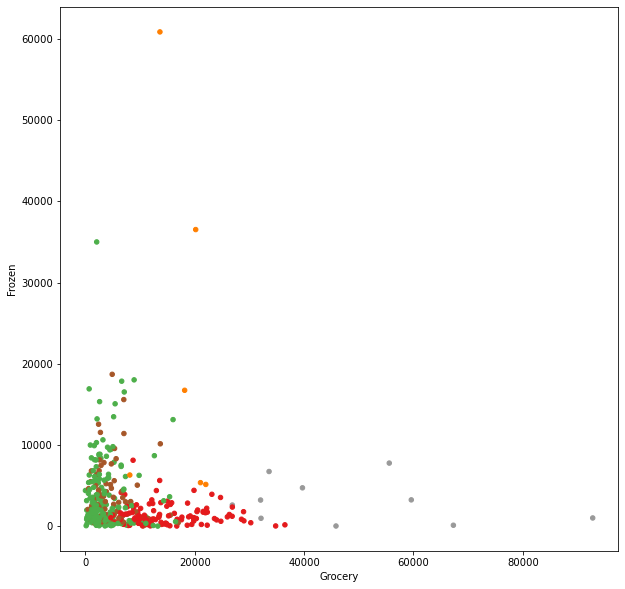

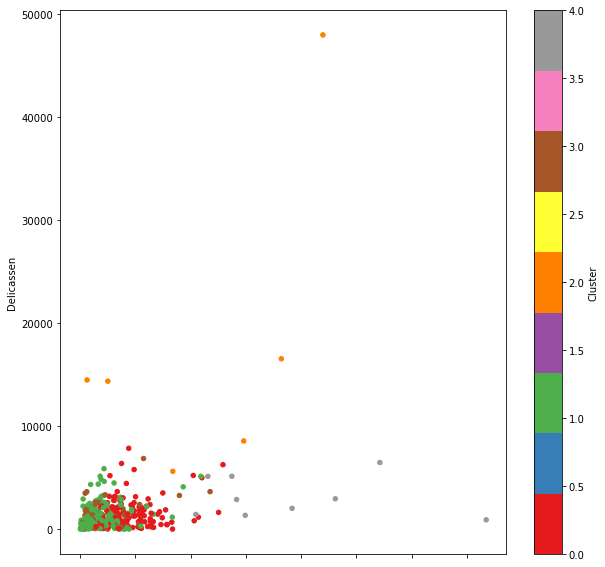

In [63]:
#그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
       colorbar=False, figsize=(10,10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1',
       colorbar=True, figsize=(10,10))
plt.show()
plt.close()

<AxesSubplot:xlabel='Milk', ylabel='Delicassen'>

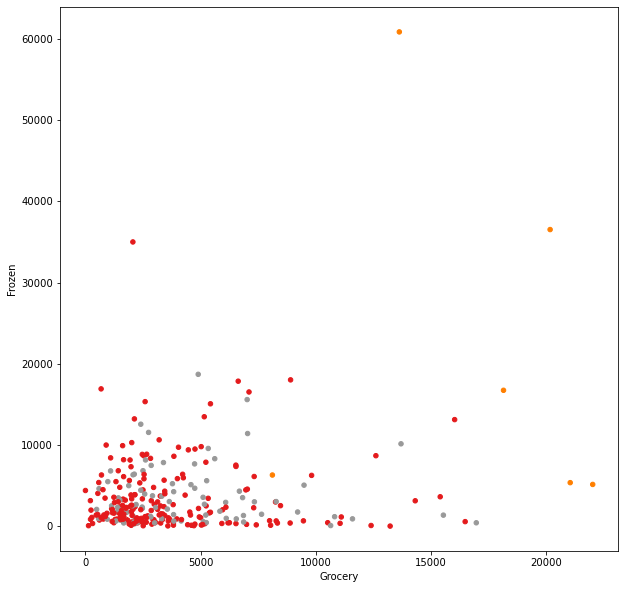

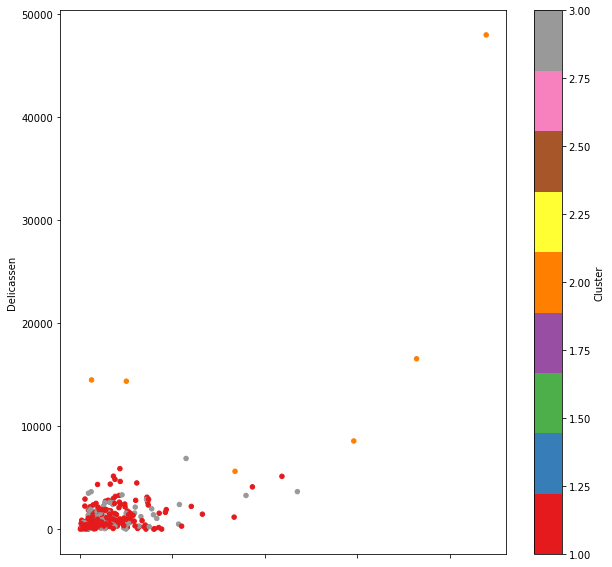

In [65]:
#큰 값으로 구성된 클러스터(0,4) 제외 - 값이 몰려 있는 구간을 자세히 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1',
        colorbar=False, figsize=(10,10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap = 'Set1',
        colorbar=True, figsize=(10,10))

In [90]:
#예제 7-8 DBSCAN 군집 분석
# -*- coding: utf-8 -*-

#기본 라이브러리 불러오기
import pandas as pd
import folium

'''
Step.1 데이터 준비/ 기본 설정
'''

#서울 시내 중학교 진학률 데이터셋
file_path = './2016_middle_school_graduates_report.xlsx'

df = pd.read_excel(file_path, header=0 ,index_col= 0)

#Ipython console 디스플레이 옵션 설정하기
pd.set_option('display.width', None) #출력 화면의 너비
pd.set_option('display.max_rows',100) #출력할 행의 개수 한도
pd.set_option('display.max_columns', 10) #출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20) #출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True) #유니코드 사용 너비 조정

#열 이름 배열 출력
print(df.columns.values)
df

['지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고' '외고_국제고'
 '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


,지역,학교명,코드,유형,주야,...,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교...,3,국립,주간,...,0.004,0,0.000,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교...,3,국립,주간,...,0.031,0,0.000,37.577473,127.003857
2,강남구,개원중학교,3,공립,주간,...,0.009,0,0.003,37.491637,127.071744
3,강남구,개포중학교,3,공립,주간,...,0.019,0,0.000,37.480439,127.062201
4,서초구,경원중학교,3,공립,주간,...,0.010,0,0.000,37.510750,127.008900
...,...,...,...,...,...,...,...,...,...,...,...
410,강남구,국립국악중학교,9,국립,주간,...,0.000,0,0.000,37.476381,127.051355
411,금천구,국립전통예술중학교,9,국립,주간,...,0.000,0,0.018,37.446354,126.906424
412,광진구,선화예술학교,9,사립,주간,...,0.000,0,0.036,37.549642,127.087737
413,중구,예원학교,9,사립,주간,...,0.048,0,0.031,37.566951,126.971553


In [92]:
'''
Step.2 데이터 탐색
'''

#데이터 살펴보기
print(df.head())
print('\n')

#데이터 자료형 확인
print(df.info())
print('\n')

#데이터 통계 요약 정보 확인
print(df.describe())

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

   기타진학  취업   미상       위도        경도  
0     0.004     0  0.000  37.594942  127.038909  
1     0.031     0  0.000  37.577473  127.003857  
2     0.009     0  0.003  37.491637  127.071744  
3     0.019     0  0.000  37.480439  127.062201  
4     0.010     0  0.000  37.510750  127.008900  

[5 rows x 20 columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야     

In [93]:
#예제 7-8 DBSCAN 군집 분석

#지도에 위치 표시
mschool_map = folium.Map(location=[37.55, 126.98], tiles='Stamen Terrain',
                        zoom_start=12)

#중학교 위치 정보를 CircleMarker로 표시
for name, lat, lng in zip (df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius = 5, #원의 반지름
                        color='brown', #원의 둘레 색상
                        fill = True,
                        fill_color='coral', #원을 채우는색
                        fill_opacity=0.7, #투명도
                        popup=name
                       ).add_to(mschool_map)
    
#지도를 html 파일로 저장하기
mschool_map.save('./seoul_mschool_location.html')

In [94]:
'''
Step.3 데이터 전처리
'''

#원핫인코딩(더미변수)
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder() #label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder() #one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())

     지역                               학교명  코드  유형  주야  ...  \
0  성북구  서울대학교사범대학부설중학교.....       3  국립  주간  ...   
1  종로구  서울대학교사범대학부설여자중학교...     3  국립  주간  ...   
2  강남구           개원중학교                     3  공립  주간  ...   
3  강남구           개포중학교                     3  공립  주간  ...   
4  서초구           경원중학교                     3  공립  주간  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 24 columns]


In [97]:
'''
Step.4 DBSCAN 군집 모형 -sklearn 사용
'''

#sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

#분석에 사용할 속성 선택(과학고, 외고국제고, 자사고 진학율)
columns_list = [9, 10, 13]
X = df.iloc[:,columns_list]
print(X[:5])
print('\n')

#설명 변수 데이터 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

#DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

#모형 학습
dbm.fit(X)

#예측(군집)
cluster_label = dbm.labels_
print(cluster_label)
print('\n')

#예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())

   과학고  외고_국제고  자사고
0   0.018        0.007   0.227
1   0.000        0.035   0.043
2   0.009        0.012   0.090
3   0.013        0.013   0.065
4   0.007        0.010   0.282


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  2 -1  0 -1
 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  1  0
 -1 -1 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1
 -1 -1  0 -1 -1 -1  0  2  0  0  0  0  0 -1 -1 -1  0 -1  0 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1 -1  1  0 -1  0  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0  1 -1
 -1  0  2  0 -1 -1  1 -1 -1 -1  0  0  0 -1 -1  0 -1 -1 -1  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0  0 -1 -1 -1 -1 -1  0 -1  0  0 -1 -1
 -1 -1 -1  0 -1 -1 -1  1  0  3  1 -1  0  0 -1  0 -1 -1  0  0  2 -1 -1  3
  0  0 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0 -1 -1  0 -1 -1 -1 -1 -1  2  0
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1 -1  0 -1  3  0  2 -1 -1
 -1 -1  0 -1 -1 -1  

In [98]:
#클러스터 값으로 그룹화하고 그룹별로 내용 출력(첫 5행만 출력)
grouped_cols = [0,1,3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key: ', key)
    print('* number: ',len(group))
    print(group.iloc[:,grouped_cols].head())
    print('\n')
    
#그래프로 표현 - 시각화
colors ={-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan'}
cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain',
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):
    folium.CircleMarker([lat,lng],
                       radius=5,
                       color=colors[clus],
                       fill=True,
                       fill_color=colors[clus],
                       fill_opacity=0.7,
                       popup=name).add_to(cluster_map)
#지도를 html 파일로 저장하기
cluster_map.save('./seoul_mschool_cluster.html')

* key:  -1
* number:  255
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  
0   0.227  
1   0.043  
2   0.090  
3   0.065  
4   0.282  


* key:  0
* number:  102
      지역          학교명  유형  과학고  외고_국제고  자사고
13  서초구  동덕여자중학교  사립     0.0        0.022   0.038
22  강남구      수서중학교  공립     0.0        0.019   0.044
28  서초구      언남중학교  공립     0.0        0.015   0.050
34  강남구      은성중학교  사립     0.0        0.016   0.065
43  송파구      거원중학교  공립     0.0        0.021   0.054


* key:  1
* number:  45
         지역          학교명  유형  과학고  외고_국제고  자사고
46     강동구      동신중학교  사립     0.0          0.0   0.044
103    양천구      신원중학교  공립     0.0          0.0   0.006
118    구로구     

In [100]:
#X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9,10,13,22]
X2 = df.iloc[:,columns_list2]
print(X2[:5])
print('\n')

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)
df['Cluster2'] = dbm2.labels_

grouped2_cols = [0,1,3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('*key :',key)
    print('*number :',len(group))
    print(group.iloc[:,grouped2_cols].head())
    print('\n')
    
cluster2_map = folium.Map(location=[37.55, 126.98], titles='Stamen Terrain', zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color=colors[clus],
                       fill=True,
                       fill_color=colors[clus],
                       fill_opacity=0.7,
                        popup=name).add_to(cluster2_map)
#지도를 html 파일로 저장하기
cluster2_map.save('./seoul_mschool_cluster2.html')

   과학고  외고_국제고  자사고  type
0   0.018        0.007   0.227     1
1   0.000        0.035   0.043     1
2   0.009        0.012   0.090     0
3   0.013        0.013   0.065     0
4   0.007        0.010   0.282     0


*key : -1
*number : 281
     지역                               학교명  유형  과학고  외고_국제고  \
0  성북구  서울대학교사범대학부설중학교.....    국립   0.018        0.007   
1  종로구  서울대학교사범대학부설여자중학교...  국립   0.000        0.035   
2  강남구           개원중학교                  공립   0.009        0.012   
3  강남구           개포중학교                  공립   0.013        0.013   
4  서초구           경원중학교                  공립   0.007        0.010   

   자사고  type  
0   0.227     1  
1   0.043     1  
2   0.090     0  
3   0.065     0  
4   0.282     0  


*key : 0
*number : 8
       지역      학교명  유형  과학고  외고_국제고  자사고  type
22   강남구  수서중학교  공립     0.0        0.019   0.044     0
43   송파구  거원중학교  공립     0.0        0.021   0.054     0
51   송파구  방이중학교  공립     0.0        0.021   0.068     0
93   강서구  방원중학교  공립     0.0        0.019   0.

In [101]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3=[9,10]
X3 = df.iloc[:,columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)
df['Cluster3'] = dbm3.labels_
grouped3_cols = [0,1,3]+columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('*key :',key)
    print('*number :', len(group))
    print(group.iloc[:,grouped3_cols].head())
    print('\n')

cluster3_map = folium.Map(location=[37.55, 126.98],tiles='Stamen Terrain', zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):
    folium.CircleMarker([lat, lng],
                       radius=5,
                       color=colors[clus],
                       fill=True,
                       fill_color=colors[clus],
                       fill_opacity=0.7,
                       popup=name).add_to(cluster3_map)
#지도를 html 파일로 저장하기
cluster3_map.save('./seoul_mschool_cluster3.html')

   과학고  외고_국제고
0   0.018        0.007
1   0.000        0.035
2   0.009        0.012
3   0.013        0.013
4   0.007        0.010


*key : -1
*number : 61
     지역                             학교명  유형  과학고  외고_국제고
0  성북구  서울대학교사범대학부설중학교.....  국립   0.018        0.007
3  강남구           개포중학교                공립   0.013        0.013
6  강남구         압구정중학교                공립   0.015        0.036
7  강남구  단국대학교사범대학부속중학교.....  사립   0.032        0.005
8  강남구           대명중학교                공립   0.013        0.029


*key : 0
*number : 160
      지역                               학교명  유형  과학고  외고_국제고
1   종로구  서울대학교사범대학부설여자중학교...  국립     0.0        0.035
13  서초구       동덕여자중학교                  사립     0.0        0.022
22  강남구           수서중학교                  공립     0.0        0.019
28  서초구           언남중학교                  공립     0.0        0.015
29  강남구           언북중학교                  공립     0.0        0.007


*key : 1
*number : 111
      지역      학교명  유형  과학고  외고_국제고
2   강남구  개원중학교  공립   0.009        0.012
